#**Insightful Real Estate Analytics: Unveiling Trends and Predicting Prices**

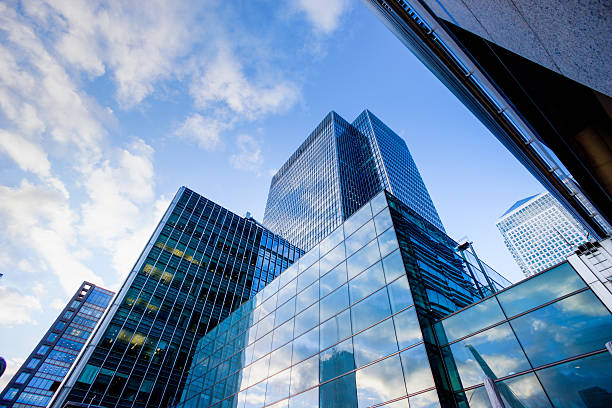

In [1]:
from IPython.display import Image
Image(filename='housing.jpg')

# Table of Contents

* [I. Introduction](#section0)
* [II. Setup and Data Loading](#section1)
* [III. Data Preprocessing](#section2)
* [IV. Exploratory Data Analysis (EDA)](#section3)
  - [A. Outliers](#section3-1)
  - [B. Correlation Analysis](#section3-2)
  - [C. Feature Distribution Analysis](#section3-3)
  - [D. Geospatial Analysis](#section3-4)
  - [E. Comparative Analysis](#section3-5)
  - [F. Temporal Analysis](#section3-6)
  - [G. Feature Importance Analysis](#section3-7)


* [V. Data Preparation](#section4)
* [VI. Model Development](#section5)
* [VII. Model Evaluation](#section6)
* [VIII. Predictive Modeling](#section7)
* [IX. Conclusion and Recommendations](#section8)
* [X. References, Resources & Appendix](#section9)


<a name="section0"></a>
#I. Introduction

* Welcome to our real estate analysis project! We’re diving into the world of property trends and pricing predictions to help individuals and businesses make smarter real estate decisions.

* The purpose of this project is to leverage data analysis and predictive modeling techniques to uncover trends and predict prices in the real estate market. By analyzing a comprehensive dataset, we aim to provide valuable insights and recommendations that empower stakeholders to make informed decisions regarding property investments, pricing strategies, and market entry timing.

* Ultimately, our goal is to enhance profitability, competitiveness, and strategic decision-making in the dynamic landscape of real estate.

## Dataset overview

Source: The dataset was sourced from a public real estate database available on Kaggle. The specific link to the dataset is here: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset

Number of Rows: The dataset contains a **21613 rows** (observations) representing individual properties or listings.

Number of Columns: The dataset consists of **21 columns** (features) that provide information about each property.

Attributes: Here's a brief description of each column:
1. id: Unique identifier for each property.
2. date: Date of the property listing.
3. price: Property price in currency.
4. bedrooms: Number of bedrooms in the property.
5. bathrooms: Number of bathrooms in the property.
6. sqft_living: Living area size in square feet.
7. sqft_lot: Total lot size in square feet.
8. floors: Number of floors in the property.
9. waterfront: Indicates if the property has a waterfront view (0 for no, 1 for yes).
10. view: Quality level of the property view (ranging from 0 to 4).
11. condition: Condition of the property (from 1 to 5, where 1 is poor and 5 is excellent).
12. grade: Overall grade given to the property, based on King County grading system.
13. sqft_above: Size of the living area above ground level in square feet.
14. sqft_basement: Size of the basement area in square feet.
15. yr_built: Year the property was built.
16. yr_renovated: Year the property was last renovated.
17. zipcode: Zip code of the property location.
18. lat: Latitude coordinate of the property.
19. long: Longitude coordinate of the property.
20. sqft_living15: Living area size of the nearest 15 properties in square feet.
21. sqft_lot15: Total lot size of the nearest 15 properties in square feet.

<a name="section1"></a>
#II. Setup and Data Loading

In [2]:
# Import Python Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import geopandas as gpd

# Load dataset
df = pd.read_csv("Housing.csv")

In [3]:
# Display a sample of the dataset
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
232,9264902050,20141121T000000,315000.0,6,2.75,2940,7350,1.0,0,0,...,8,1780,1160,1978,0,98023,47.3103,-122.339,2120,8236
12166,1498303855,20150224T000000,718000.0,4,2.75,2930,4408,1.0,0,0,...,8,1660,1270,1939,0,98144,47.5841,-122.295,2200,4000
15199,9834200305,20140716T000000,350000.0,3,1.00,1790,3876,1.5,0,0,...,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080
19063,1702901340,20140613T000000,718500.0,3,2.00,2910,6600,2.0,0,0,...,7,1920,990,1900,1988,98118,47.5576,-122.281,1370,5500
20968,3336500180,20140605T000000,324500.0,3,2.50,1660,3990,2.0,0,0,...,7,1660,0,2009,0,98118,47.5298,-122.268,1670,4050


<a name="section2"></a>
#III. Data Preprocessing

In [4]:
# Listing the columns of the DataFrame
print(f"Columns of the dataset are as follow: {df.columns}")

# Examining the index of the DataFrame
print(f"Index of the DataFrame: {df.index}")

# Examining the numbers of rows and columns
print(f"Numbers of rows and columns: {df.shape}")

Columns of the dataset are as follow: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index of the DataFrame: RangeIndex(start=0, stop=21613, step=1)
Numbers of rows and columns: (21613, 21)


In [5]:
# Describe statistics of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Display summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Comments: The dataset has 21 columns.
There are 21,613 non-null values in each column, indicating that there are no missing values in the dataset.
The data types (Dtype) of the columns vary, with most columns being of type int64 (integer) and float64 (floating-point numbers), and one column (date) being of type object (likely representing dates as strings).

In [7]:
# Double-check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Notes:
- The 'id' column is currently of integer type; however, it should be converted to object type since it serves as an identifier for different housing units and is not intended for mathematical calculations. The 'id' column uniquely identifies each record in the dataset.

- The 'date' is in the format "YYYYMMDDT000000". It needs to be formatted as "YYYYMMDD" for analysis.

In [8]:
# Convert "id" to object type
df['id'] = df['id'].astype('object')

# Check conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
# Extract the year, month and day only
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime format if not already done
df['date'] = df['date'].dt.date  # Extract date component

# Check for date format update
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<a name="section3"></a>
#IV. Exploratory Data Analysis (EDA)

<a name="section3-1"></a>
## A. Outliers



  We are going to determine outliers using two different methods:
  1. Visual Inspection, and
  2. Statistical methds

Visual Inspection:

Start by visually inspecting numerical columns using box plots, histograms, or scatter plots.
Look for data points that are far away from the central tendency of the data (e.g., points beyond the whiskers in a box plot).
Statistical Methods:

Calculate summary statistics such as mean, median, standard deviation, quartiles, and range for each numerical column.
Use statistical methods like the Z-score or IQR (Interquartile Range) to detect outliers:
Z-score: Identify data points that are more than 3 standard deviations away from the mean.
IQR: Define outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively.

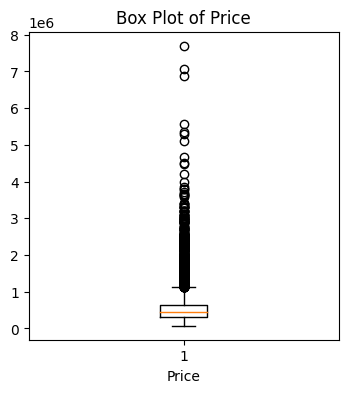

In [10]:
# 1. Determine outlier using Visual Inspection (box plots, histograms, scatter plots)
# Box Plot for 'price' column
plt.figure(figsize=(4,4))
plt.boxplot(df['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

Interpretation:
- The line inside the box, which represents the median price, is closer to the bottom of the box, which shows that more than half of the prices are on the lower end of the scale.
- The box itself represents the middle 50% of the data (from the 25th to the 75th percentile). The relatively small size of the box compared to the entire range of the data suggests that there is a high concentration of prices within a relatively narrow range.
- The whiskers extend from the box to the highest and lowest values that are not considered outliers. The lower whisker is very short, indicating that the prices are not spread out below the first quartile.
- The individual points above the upper whisker represent outliers, which are prices that are considerably higher than the rest. There are a significant number of outliers, which suggests that there are quite a few properties that are priced much higher than the typical property within the dataset.

Comments: The box plot of price shows a right-skewed distribution with most property prices low and a few extreme high-priced outliers. The median is near the lower quartile, indicating a concentration of lower prices. There are many outliers, suggesting some properties are priced much higher than the average.

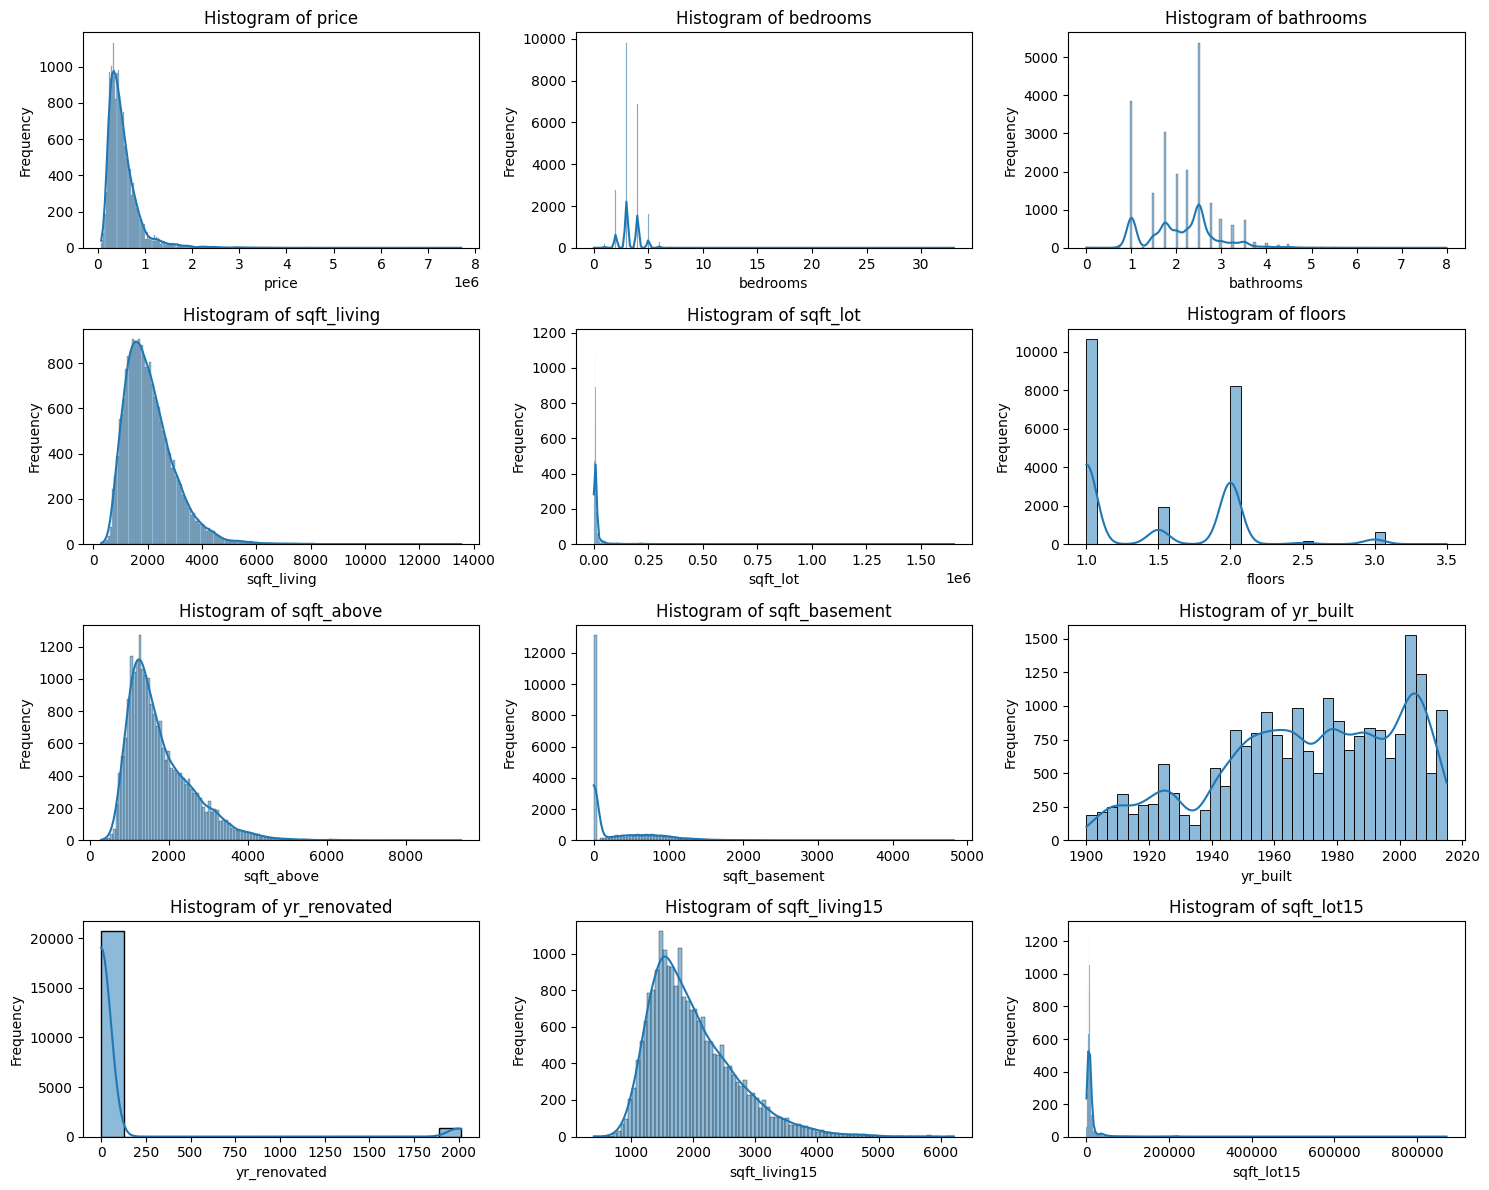

In [11]:
# 1. Determine outlier using Visual Inspection (box plots, histograms)
# Histograms numerical columns
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Interpretation:
These histograms show the distribution of different variables likely related to housing data:

1. **Histogram of price**: Shows a right-skewed distribution with a peak at the lower end of the price range, indicating most houses are priced low with a few high priced houses.

2. **Histogram of bedrooms**: Indicates that the number of bedrooms is generally low (most likely between 2 and 4), with very few houses having a large number of bedrooms.

3. **Histogram of bathrooms**: Similar to bedrooms, the distribution of bathrooms is concentrated on the lower end, with most houses having fewer than 3 bathrooms.

4. **Histogram of sqft_living**: This shows a right-skewed distribution, meaning most of the houses have a lower square footage for living space, with a tail going towards higher square footage.

5. **Histogram of sqft_lot**: Highly right-skewed, indicating that while most houses have smaller lot sizes, there are some houses with very large lots.

6. **Histogram of floors**: Indicates that most houses have 1 or 2 floors, with very few having 3 or more.

7. **Histogram of sqft_above**: The distribution is right-skewed, showing most houses have a smaller 'above ground' living area.

8. **Histogram of sqft_basement**: Many houses do not have a basement (indicated by the spike at zero), and for those that do, the square footage is generally low.

9. **Histogram of yr_built**: It appears somewhat uniformly distributed with certain peaks, suggesting that more houses were built in certain periods.

10. **Histogram of yr_renovated**: Shows that most houses have not been renovated (indicated by the spike at zero), with a few exceptions.

11. **Histogram of sqft_living15**: Slightly right-skewed distribution for the living area square footage of the 15 closest neighbors, with most neighbors having lower square footage.

12. **Histogram of sqft_lot15**: Highly skewed to the right, similar to sqft_lot, indicating that neighboring houses typically have smaller lot sizes, with some outliers with very large lots.

Commments: The overall trend across these histograms suggests that most houses in this dataset are modest in size (in terms of living space, lot size, number of bedrooms and bathrooms), with a smaller number of houses that are much larger or have more features. The skewness in these distributions is likely causing the outliers you noticed in the box plot of prices. Outliers in price may be related to the houses that have more bedrooms, larger square footage, etc.

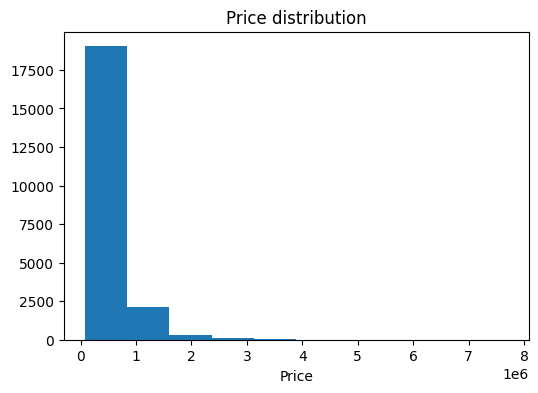

In [12]:
# 1. Determine outlier using Visual Inspection (box plots, histograms, scatter plots)
# Histogram for 'price' column
plt.figure(figsize = (6,4))
plt.hist(df['price'])
plt.xlabel('Price')
plt.title('Price distribution')
plt.show()

Comments:
- Most of the property prices are on the lower end, which suggests that affordable housing makes up a large portion of this market or dataset.
- The long tail to the right indicates that there are relatively few very high-value properties in comparison to the number of lower-priced ones.

In [13]:
# 2. Determine outlier using Statistical methods (Z-score, and IQR)
# Determine Z-score for 'price' column
z_scores = zscore(df['price'])
# Define threshold for outlier detection (e.g., Z-score > 3 or < -3)
threshold = 3
# Get outliers based on Z-score
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
153,7855801670,2015-04-01,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
269,7960900060,2015-05-04,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
282,7424700045,2015-05-13,2050000.0,5,3.00,3830,8480,2.0,0,1,...,9,2630,1200,1905,1994,98122,47.6166,-122.287,3050,7556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,3262300818,2015-02-27,1865000.0,4,3.75,3790,8797,2.0,0,0,...,11,3290,500,2006,0,98039,47.6351,-122.236,2660,12150
21530,8964800330,2015-04-07,3000000.0,4,3.75,5090,14823,1.0,0,0,...,11,4180,910,2013,0,98004,47.6200,-122.207,3030,12752
21540,715010530,2015-01-13,1881580.0,5,3.50,4410,13000,2.0,0,3,...,10,2920,1490,2014,0,98006,47.5382,-122.111,5790,12969
21568,524059330,2015-01-30,1700000.0,4,3.50,3830,8963,2.0,0,0,...,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777


In [14]:
# 2. Determine outlier using Statistical methods (Z-score, and IQR)
# Determine IQR for 'price' column
# Calculate quartiles and IQR for 'price' column
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Get outliers based on IQR
outliers_iqr = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers_iqr

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1802000060,2014-06-12,1325000.0,5,2.25,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
125,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,524059330,2015-01-30,1700000.0,4,3.50,3830,8963,2.0,0,0,...,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777
21576,9253900271,2015-01-07,3567000.0,5,4.50,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21590,7430200100,2014-05-14,1222500.0,4,3.50,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
21597,191100405,2015-04-21,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125


Comments: The 'price' column in the outliers DataFrame contains significantly higher values compared to the rest of the dataset. These high prices may represent luxury properties or anomalies in the data.

### What to do with the outliers?
- The outliers in the `price` column are valid data points and represent real-world situations (e.g., luxury properties, high-end markets), so we are keeping them in the dataset. However, be aware that they can disproportionately influence statistical measures and machine learning models.

<a name="section3-2"></a>
## B. Correlation Analysis

Correlation analysis is used to determine the relationship between two quantitative variables. In the context of real estate, it helps us understand how different features of properties, like size, location, and the number of rooms, are related to the property's price.

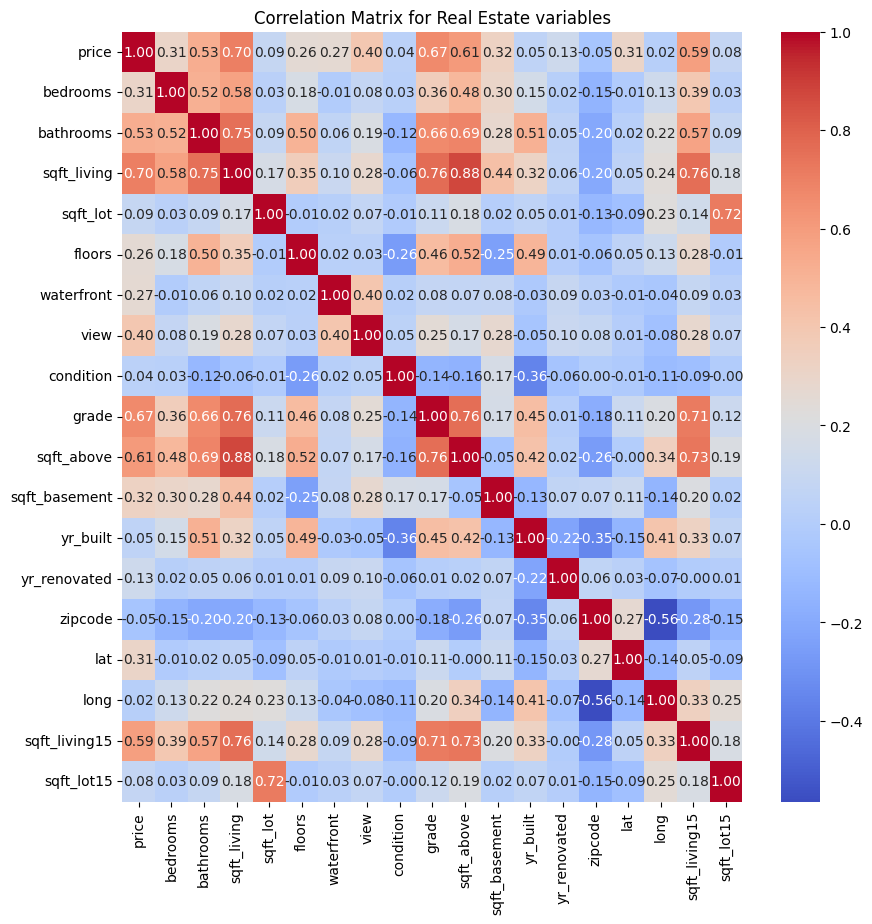

In [15]:
# Exclude 'date' and 'id' columns from the correlation analysis
df_for_correlation = df.drop(['date', 'id'], axis=1)

# Calculate the coefficents of correlation
correlation_matrix = df_for_correlation.corr()

# Display the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix for Real Estate variables')
plt.show()

Interpretation:
1. **Price Relationships**:
   - `price` has a strong positive correlation with `sqft_living`, `grade`, `sqft_above`, and somewhat with `bathrooms` and `sqft_living15`. This suggests that larger living spaces, higher quality grades, and more bathrooms are associated with higher property prices.

2. **Size Attributes**:
   - `sqft_living`, `sqft_above`, and `sqft_living15` are all strongly correlated with each other, which is expected as they all represent aspects of the property size.

3. **Year and Condition**:
   - `yr_built` and `yr_renovated` show a very low correlation with `price`, indicating that the age of the building and renovation may not be primary factors in determining the price.
   - `condition` also has a low correlation with `price`, suggesting that the overall condition of the property is not significantly affecting its price in this dataset.

4. **Location**:
   - The geographical coordinates (`lat`, `long`) have a moderate correlation with `price`, indicating that location does play a role in pricing, which is a well-known factor in real estate.

<a name="section3-3"></a>
## C. Feature Distribution Analysis

This stage involves exploring the distribution of individual features and assessing their potential impact on property prices.

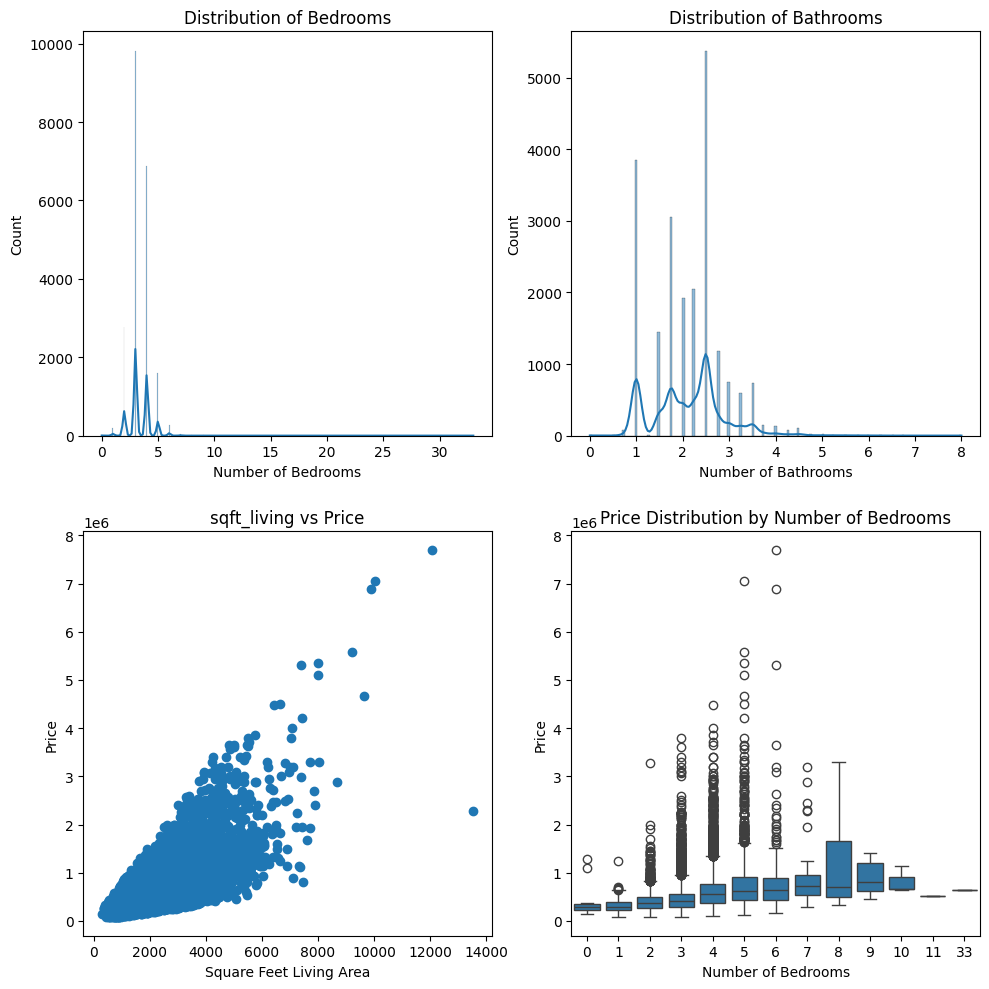

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure for a 2x2 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Histogram of Bedrooms
sns.histplot(df['bedrooms'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Bedrooms')
axs[0, 0].set_xlabel('Number of Bedrooms')
axs[0, 0].set_ylabel('Count')

# Histogram of Bathrooms
sns.histplot(df['bathrooms'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Bathrooms')
axs[0, 1].set_xlabel('Number of Bathrooms')
axs[0, 1].set_ylabel('Count')

# Scatter Plot of sqft_living vs Price
axs[1, 0].scatter(df['sqft_living'], df['price'])
axs[1, 0].set_title('sqft_living vs Price')
axs[1, 0].set_xlabel('Square Feet Living Area')
axs[1, 0].set_ylabel('Price')

# Boxplot of Prices by Number of Bedrooms
sns.boxplot(x='bedrooms', y='price', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Price Distribution by Number of Bedrooms')
axs[1, 1].set_xlabel('Number of Bedrooms')
axs[1, 1].set_ylabel('Price')

# Adjust layout for readability
plt.tight_layout()
plt.show()


Interpretation:
1. **Distribution of Bedrooms**:
   - The majority of properties have between 2 to 4 bedrooms. There are a few properties with a larger number of bedrooms, with the distribution showing a long tail to the right, indicating skewness. The presence of properties with an unusually high number of bedrooms might represent unique properties.

2. **Distribution of Bathrooms**:
   - Similar to bedrooms, the distribution of bathrooms shows that most properties have between 1 to 3 bathrooms. The distribution is right-skewed with a few properties having more than the common number of bathrooms.

3. **sqft_living vs Price**:
   - There is a clear positive trend indicating that as the square footage of the living area increases, the price tends to increase as well. However, there are outliers at the higher end of the price range, indicating some properties are priced significantly higher than others with similar living areas.

4. **Price Distribution by Number of Bedrooms**:
   - There is an increasing trend in median price as the number of bedrooms increases up to around 8 bedrooms. Beyond that, the relationship is not as clear, possibly due to a lower number of properties with more than 8 bedrooms, which could be outliers or special cases.

Comments: These plots provide valuable insights into how the features of properties are related to their prices. Properties with more bedrooms and larger living areas tend to have higher prices, but the relationship may not be linear, and there could be diminishing returns to additional space or rooms. The outliers in the data suggest that there may be luxury properties or properties with special features that command higher prices regardless of size.

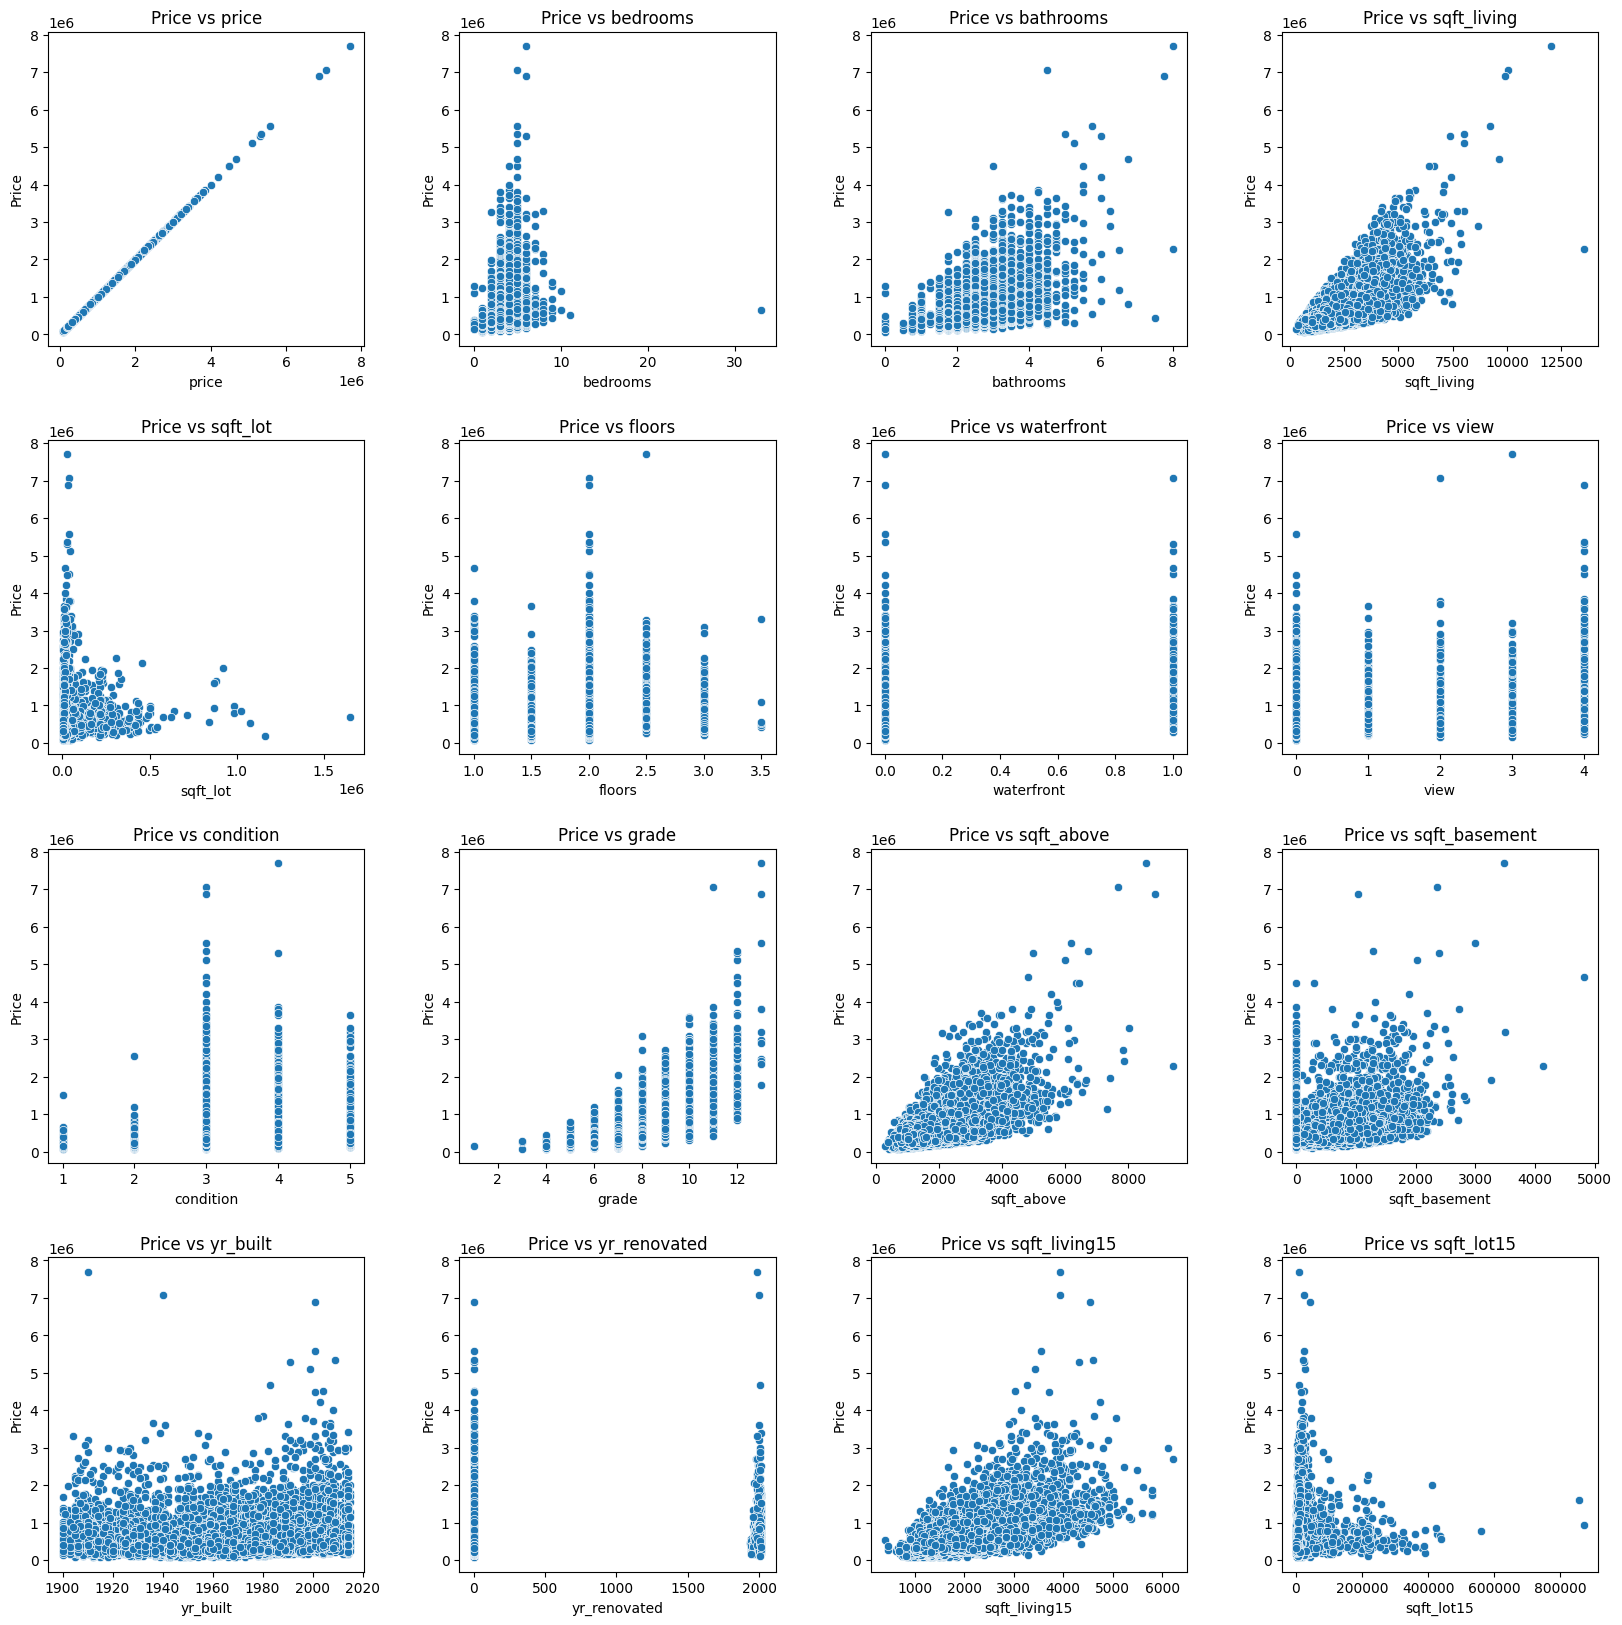

In [17]:
# Display scatters of price vs other columns
# Create a DataFrame excluding 'id', 'date', 'zipcode','lat', and 'long' columns
df_numeric = df.drop(['date', 'id', 'zipcode','lat','long'], axis=1)

# Retrieve the list of column names to iterate over
numerical_columns = df_numeric.columns.tolist()

# Determine the number of plots based on the number of numerical columns
num_plots = len(numerical_columns)
num_columns = 4  # Define how many columns you want in your subplot grid
num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the matplotlib figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 5, num_rows * 5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Iterate over the numerical columns and create a scatter plot for each
for i, col in enumerate(numerical_columns):
    row = i // num_columns
    col_idx = i % num_columns
    ax = axes[row, col_idx]
    sns.scatterplot(x=df[col], y=df['price'], ax=ax)
    ax.set_title(f'Price vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

# If the number of numerical columns is not a multiple of the number of columns in the grid, hide the empty subplot(s)
if num_plots % num_columns != 0:
    for j in range(num_plots, num_rows * num_columns):
        axes.flatten()[j].axis('off')

# Show the plot
plt.show()

Interpretation:
The scatter plots illustrate various relationships between the 'price' and other attributes of the properties in the dataset. Here are some observations:

1. **Price vs Bedrooms/Bathrooms**:
   - There's an increasing trend where more `bedrooms` or `bathrooms` generally correlate with a higher price. However, the relationship isn't strictly linear, especially for a very high number of bedrooms where the data becomes sparse.

2. **Price vs Square Footage (Living Area, Above, Basement, Lot15)**:
   - The living area (both `sqft_living` and `sqft_above`) shows a strong positive correlation with the price. The plots indicate that larger living spaces significantly influence higher prices. The `sqft_basement` and `sqft_lot15` also show positive trends but less pronounced than the living area.

3. **Price vs Floors**:
   - There is some indication that properties with more floors may be priced higher, but the correlation is not as strong as with square footage.

4. **Price vs Waterfront/View**:
   - Properties with a waterfront and a higher view score appear to command higher prices, although these features are less common, as seen by the fewer data points.

5. **Price vs Condition/Grade**:
   - The 'grade' attribute shows a strong positive correlation with price, suggesting that higher-graded properties are valued more. 'Condition' seems to have a less obvious impact on the price.

6. **Price vs Year Built/Renovated**:
   - The 'yr_built' scatter doesn't show a clear trend, indicating that the age of the property alone is not a strong indicator of price. The 'yr_renovated' plot has many points clustered at zero (perhaps indicating properties not renovated), and a few scattered data points for properties that have been renovated, making it difficult to discern a clear relationship.

7. **Price vs Lot Size (sqft_lot)**:
   - The lot size appears to have little to no clear correlation with price within the majority range of lot sizes. There might be a slight increase in price for some of the larger lot sizes, but the data is quite scattered.

Comments: Overall, these plots highlight that certain property characteristics, especially those related to quality ('grade') and size ('sqft_living'), are more directly associated with property prices than other characteristics like the age of the property or lot size. The data also suggest that while some features like 'waterfront' and 'view' are less common, they are important factors in the pricing of properties that possess them.

<a name="section3-4"></a>
## D. Geospatial Analysis

Geospatial analysis involves examining how the geographic location of properties influences their price. The key components often include latitude and longitude coordinates, which can provide insights into location-based trends such as proximity to city centers, natural features, amenities, and neighborhood desirability

In [18]:
# Import Python Packages
!pip install mapclassify
import mapclassify

<Figure size 1000x1000 with 0 Axes>

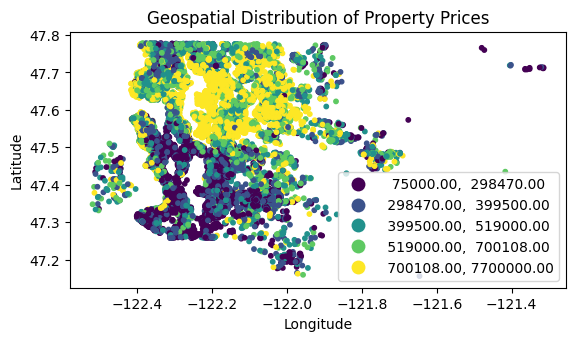

In [19]:
# Create a map where each property is plotted with colors indicating its price
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']))

# Set the size of the figure
plt.figure(figsize=(10, 10))

# Plot the points with price as color
gdf.plot(column='price', scheme="quantiles", legend=True, markersize=10)

# Set the title and axes labels
plt.title('Geospatial Distribution of Property Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [20]:
!pip install branca
import branca

In [21]:
"""import folium
import branca

# Function to calculate color based on price
def price_to_color(price, min_price, max_price):
    # Normalize the price value
    normalized_price = (price - min_price) / (max_price - min_price)
    # Convert to a color
    hex_color = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(10)(normalized_price)
    return hex_color

# Calculate minimum and maximum prices for color scale
min_price = df['price'].min()
max_price = df['price'].max()

# Create a map centered around the average coordinates of the dataset
map_center = [df['lat'].mean(), df['long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add points to the map with colors based on price
for idx, row in df.iterrows():
    color = price_to_color(row['price'], min_price, max_price)
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.6
                       ).add_to(m)

# Show the map
m
"""

"import folium\nimport branca\n\n# Function to calculate color based on price\ndef price_to_color(price, min_price, max_price):\n    # Normalize the price value\n    normalized_price = (price - min_price) / (max_price - min_price)\n    # Convert to a color\n    hex_color = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(10)(normalized_price)\n    return hex_color\n\n# Calculate minimum and maximum prices for color scale\nmin_price = df['price'].min()\nmax_price = df['price'].max()\n\n# Create a map centered around the average coordinates of the dataset\nmap_center = [df['lat'].mean(), df['long'].mean()]\nm = folium.Map(location=map_center, zoom_start=10)\n\n# Add points to the map with colors based on price\nfor idx, row in df.iterrows():\n    color = price_to_color(row['price'], min_price, max_price)\n    folium.CircleMarker([row['lat'], row['long']],\n                        radius=3,\n                        color=color,\n                        fill=True,\n                    

In [22]:
"""# Display an interactive map of the the geospatial distribution on a real map
import folium

# Starting point for the map (use the mean of the latitude and longitude of your dataset)
map_center = [df['lat'].mean(), df['long'].mean()]

# Create a map object
m = folium.Map(location=map_center, zoom_start=10)

# Plot each property on the map
for idx, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        weight=1,
                        color='blue',
                        fill_color='blue',
                        fill_opacity=0.6,
                        tooltip=f'Price: ${row["price"]:.0f}'
                       ).add_to(m)

# Display the map
m
"""

'# Display an interactive map of the the geospatial distribution on a real map\nimport folium\n\n# Starting point for the map (use the mean of the latitude and longitude of your dataset)\nmap_center = [df[\'lat\'].mean(), df[\'long\'].mean()]\n\n# Create a map object\nm = folium.Map(location=map_center, zoom_start=10)\n\n# Plot each property on the map\nfor idx, row in df.iterrows():\n    folium.CircleMarker([row[\'lat\'], row[\'long\']],\n                        radius=3,\n                        weight=1,\n                        color=\'blue\',\n                        fill_color=\'blue\',\n                        fill_opacity=0.6,\n                        tooltip=f\'Price: ${row["price"]:.0f}\'\n                       ).add_to(m)\n\n# Display the map\nm\n'

In [23]:
import folium
import branca.colormap as cm

# Assuming 'df' is your DataFrame and it contains 'lat', 'long', and 'price'
# You need to normalize your 'price' data to fit the color scale:
min_price = df['price'].min()
max_price = df['price'].max()
price_range = max_price - min_price

"""# Create a color scale
linear = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_price, vmax=max_price)

# Create a new map:
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# Add points to the map with colors based on the 'price'
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=linear(row['price']),
        fill=True,
        fill_color=linear(row['price'])
    ).add_to(m)

# Display the map
m.save('map_with_colored_points.html')
"""

"# Create a color scale\nlinear = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_price, vmax=max_price)\n\n# Create a new map:\nm = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)\n\n# Add points to the map with colors based on the 'price'\nfor _, row in df.iterrows():\n    folium.CircleMarker(\n        location=[row['lat'], row['long']],\n        radius=5,\n        color=linear(row['price']),\n        fill=True,\n        fill_color=linear(row['price'])\n    ).add_to(m)\n\n# Display the map\nm.save('map_with_colored_points.html')\n"

In [24]:
m

NameError: name 'm' is not defined

In [ ]:
"""import folium

# Assuming 'df' contains 'lat' for latitude and 'long' for longitude, and 'price' for the property prices
# Create a map centered around the average coordinates of the dataset
map_center = [df['lat'].mean(), df['long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add points to the map
for idx, row in df.iterrows():
    # Create a popup with price information
    popup = folium.Popup(f'Price: ${row["price"]:.2f}', parse_html=True)
    # Create a marker with the popup
    marker = folium.Marker(location=[row['lat'], row['long']], popup=popup)
    # Add marker to map
    marker.add_to(m)

# Show the map
m
"""

<a name="section3-5"></a>
## E. Comparative Analysis

<a name="section3-6"></a>
## F. Temporal Analysis


<a name="section3-7"></a>
## G. Feature Importance Analysis

<a name="section4"></a>
#V. Data Preparation

<a name="section5"></a>
#VI. Model Development

<a name="section6"></a>
#VII. Model Evaluation

<a name="section7"></a>
#VIII. Predictive Modeling

<a name="section8"></a>
#IX. Conclusion and Recommendations

<a name="section9"></a>
#IX. References, resources and Appendix

In [25]:
from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv('cleaned dataset.csv', index=False)

# Download the final table
files.download('cleaned dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>